In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import KNN 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('/content/drive/My Drive/AirBnb Project/listings.csv',index_col=['id'],parse_dates = ['first_review','last_review'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1947,https://www.airbnb.com/rooms/1947,20200423041458,2020-04-23,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",NaN,NaN,https://a0.muscache.com/im/pictures/40d375a8-5...,NaN,2153,https://www.airbnb.com/users/show/2153,Linda,2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3c130...,https://a0.muscache.com/im/pictures/user/3c130...,River North,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Chicago, IL, United States",Near North Side,Near North Side,NaN,...,$0.00,14,60,14,18,60,60,14.2,60.0,5 weeks ago,t,0,3,3,3,2020-04-23,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,7,7,0,0,0.06
2384,https://www.airbnb.com/rooms/2384,20200423041458,2020-04-23,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) person only - t...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,NaN,...,$0.00,2,90,2,2,1125,1125,2.0,1125.0,5 weeks ago,t,22,50,77,322,2020-04-23,178,30,2015-01-09,2019-12-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Ill

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Columns: 105 entries, listing_url to reviews_per_month
dtypes: datetime64[ns](2), float64(20), int64(22), object(61)
memory usage: 6.9+ MB


In [7]:
data.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=105)

In [0]:
to_drop = ['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','neighborhood_overview','notes','transit','access',	'interaction',	'house_rules',	'thumbnail_url',	'medium_url',	'picture_url',	'xl_picture_url',	'host_id','host_url','host_name',	'host_since'	,'host_location',	'host_about',	'host_response_time','host_is_superhost',	'host_thumbnail_url',	'host_picture_url',	'host_neighbourhood',	'host_listings_count',	'host_total_listings_count',	'host_verifications',	'host_has_profile_pic',	'host_identity_verified',	'street',	'neighbourhood',	'neighbourhood_cleansed',	'neighbourhood_group_cleansed','host_response_rate',	'host_acceptance_rate']

In [9]:
data_num = data.drop(columns=to_drop)
data_num.head()

,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1947,Chicago,IL,60610,Chicago,"Chicago, IL",US,United States,41.90246,-87.63405,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$59.00,$500.00,NaN,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,5 weeks ago,t,0,3,3,3,2020-04-23,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,7,7,0,0,0.06
2384,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78790,-87.58780,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",NaN,$55.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,90,2,2,1125,1125,2.0,1125.0,5 weeks ago,t,22,50,77,322,2020-04-23,178,30,2015-01-09,2019-12-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.76
4505,Chicago,IL,60608,Chicago,"Chicago, IL",US,United States,41.85495,-87.69696,t,Apartment,Entire home/apt,7,1.0,3.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$117.00,$925.00,NaN,$0.00,$30.00,2,$20.00,2,60,2,2,60,60,2.0,60.0,today,t,0,13,31,146,2020-04-23,394,27,2009-03-06,2020-02-16,96.0,10.0,9.0,10.0,10.0,9.0,9.0,t,R19000037538,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,1,1,0,0,2.91
7126,Chicago,IL,60622,Chicago,"Chicago, IL",US,United States,41.90289,-87.68182,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$80.00,$600.00,NaN,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,6 weeks ago,t,29,55,82,335,2020-04-23,384,48,2009-07-03,2020-03-08,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,R18000034991,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,1,1,0,0,2.92
9811,Chicago,IL,60614,Chicago,"Chicago, IL",US,United States,41.91769,-87.63788,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$150.00,"$1,050.00","$3,400.00",$0.00,$85.00,3,$25.00,4,180,4,4,180,180,4.0,180.0,3 months ago,t,4,27,57,320,2020-04-23,49,16,2014-04-15,2019-10-23,92.0,10.0,9.0,10.0,9.0,10.0,9.0,t,2079260,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,11,11,0,0,0.67


In [10]:
to_drop = ['city',	'state'	,'zipcode',	'market',	'smart_location',	'country_code',	'country','is_location_exact',	'property_type','room_type','bed_type',	'amenities','calendar_updated',	'has_availability','calendar_last_scraped','requires_license',	'license',	'jurisdiction_names',	'instant_bookable',	'is_business_travel_ready',	'cancellation_policy',	'require_guest_profile_picture',	'require_guest_phone_verification','first_review','last_review']
data_num = data_num.drop(columns= to_drop)
data_num.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1947,41.90246,-87.63405,2,1.0,0.0,1.0,NaN,$59.00,$500.00,NaN,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,0,3,3,3,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,7,7,0,0,0.06
2384,41.78790,-87.58780,1,1.0,1.0,1.0,NaN,$55.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,90,2,2,1125,1125,2.0,1125.0,22,50,77,322,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.76
4505,41.85495,-87.69696,7,1.0,3.0,5.0,NaN,$117.00,$925.00,NaN,$0.00,$30.00,2,$20.00,2,60,2,2,60,60,2.0,60.0,0,13,31,146,394,27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1,0,0,2.91
7126,41.90289,-87.68182,2,1.0,1.0,1.0,NaN,$80.00,$600.00,NaN,$0.00,$0.00,1,$0.00,2,60,2,2,60,60,2.0,60.0,29,55,82,335,384,48,93.0,10.0,9.0,10.0,10.0,10.0,10.0,1,1,0,0,2.92
9811,41.91769,-87.63788,4,1.0,1.0,0.0,NaN,$150.00,"$1,050.00","$3,400.00",$0.00,$85.00,3,$25.00,4,180,4,4,180,180,4.0,180.0,4,27,57,320,49,16,92.0,10.0,9.0,10.0,9.0,10.0,9.0,11,11,0,0,0.67


In [11]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      8520 non-null   float64
 1   longitude                                     8520 non-null   float64
 2   accommodates                                  8520 non-null   int64  
 3   bathrooms                                     8516 non-null   float64
 4   bedrooms                                      8514 non-null   float64
 5   beds                                          8479 non-null   float64
 6   square_feet                                   47 non-null     float64
 7   price                                         8520 non-null   object 
 8   weekly_price                                  507 non-null    object 
 9   monthly_price                                 494 non-nu

In [0]:
data_num = data_num.drop(columns = ['weekly_price','monthly_price','square_feet'])

In [13]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      8520 non-null   float64
 1   longitude                                     8520 non-null   float64
 2   accommodates                                  8520 non-null   int64  
 3   bathrooms                                     8516 non-null   float64
 4   bedrooms                                      8514 non-null   float64
 5   beds                                          8479 non-null   float64
 6   price                                         8520 non-null   object 
 7   security_deposit                              6393 non-null   object 
 8   cleaning_fee                                  7663 non-null   object 
 9   guests_included                               8520 non-n

In [14]:
data_num['price'], data_num['cleaning_fee'], data_num['security_deposit'], data_num['extra_people']

(id
 1947         $59.00
 2384         $55.00
 4505        $117.00
 7126         $80.00
 9811        $150.00
              ...   
 43239736     $65.00
 43249502    $200.00
 43250054     $63.00
 43254537     $75.00
 43255785    $100.00
 Name: price, Length: 8520, dtype: object, id
 1947          $0.00
 2384         $20.00
 4505         $30.00
 7126          $0.00
 9811         $85.00
              ...   
 43239736        NaN
 43249502    $150.00
 43250054        NaN
 43254537        NaN
 43255785        NaN
 Name: cleaning_fee, Length: 8520, dtype: object, id
 1947        $100.00
 2384          $0.00
 4505          $0.00
 7126          $0.00
 9811          $0.00
              ...   
 43239736        NaN
 43249502    $500.00
 43250054        NaN
 43254537        NaN
 43255785        NaN
 Name: security_deposit, Length: 8520, dtype: object, id
 1947         $0.00
 2384         $0.00
 4505        $20.00
 7126         $0.00
 9811        $25.00
              ...  
 43239736     $0.00
 432495

In [0]:
data_num['cleaning_fee'] = data_num['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)
data_num['price'] = data_num['price'].str.replace('$','').str.replace(',','').astype(float)
data_num['security_deposit'] = data_num['security_deposit'].str.replace('$','').str.replace(',','').astype(float)
data_num['extra_people'] = data_num['extra_people'].str.replace('$','').str.replace(',','').astype(float)

In [16]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 1947 to 43255785
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      8520 non-null   float64
 1   longitude                                     8520 non-null   float64
 2   accommodates                                  8520 non-null   int64  
 3   bathrooms                                     8516 non-null   float64
 4   bedrooms                                      8514 non-null   float64
 5   beds                                          8479 non-null   float64
 6   price                                         8520 non-null   float64
 7   security_deposit                              6393 non-null   float64
 8   cleaning_fee                                  7663 non-null   float64
 9   guests_included                               8520 non-n

In [17]:
data_num.isnull().sum() 

latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          4
bedrooms                                           6
beds                                              41
price                                              0
security_deposit                                2127
cleaning_fee                                     857
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                        

In [18]:
knn_imputer = KNN()
data_num.iloc[:,:]= knn_imputer.fit_transform(data_num)

Imputing row 1/8520 with 0 missing, elapsed time: 20.938
Imputing row 101/8520 with 0 missing, elapsed time: 20.941
Imputing row 201/8520 with 0 missing, elapsed time: 20.947
Imputing row 301/8520 with 0 missing, elapsed time: 20.949
Imputing row 401/8520 with 0 missing, elapsed time: 20.953
Imputing row 501/8520 with 0 missing, elapsed time: 20.957
Imputing row 601/8520 with 0 missing, elapsed time: 20.960
Imputing row 701/8520 with 0 missing, elapsed time: 20.964
Imputing row 801/8520 with 7 missing, elapsed time: 20.967
Imputing row 901/8520 with 0 missing, elapsed time: 20.970
Imputing row 1001/8520 with 1 missing, elapsed time: 20.973
Imputing row 1101/8520 with 1 missing, elapsed time: 20.979
Imputing row 1201/8520 with 0 missing, elapsed time: 20.985
Imputing row 1301/8520 with 0 missing, elapsed time: 20.989
Imputing row 1401/8520 with 1 missing, elapsed time: 20.991
Imputing row 1501/8520 with 0 missing, elapsed time: 20.994
Imputing row 1601/8520 with 0 missing, elapsed time:

In [19]:
data_num.isnull().sum() 

latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0


In [0]:
scaler = StandardScaler()
scaler.fit(data_num)
data_num_scaled = scaler.transform(data_num)

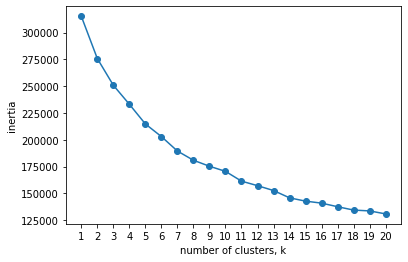

In [21]:
ks = range(1, 21) # number of clusters to test 
inertias = [] 

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(data_num_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# the output provides a linegraph of inertias given different numbers of clusters
# this is useful to identify the best number of clusters to choose (using the elbow method)

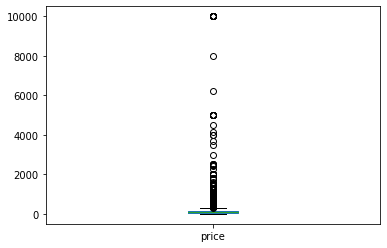

In [25]:
data_num['price'].plot(kind='box')

In [28]:
data_num['price'].describe()

count     8520.000000
mean       172.760915
std        448.794705
min          0.000000
25%         60.000000
50%        100.000000
75%        165.000000
max      10000.000000
Name: price, dtype: float64

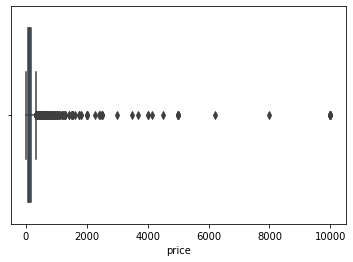

In [35]:
sns.boxplot(data_num['price'])

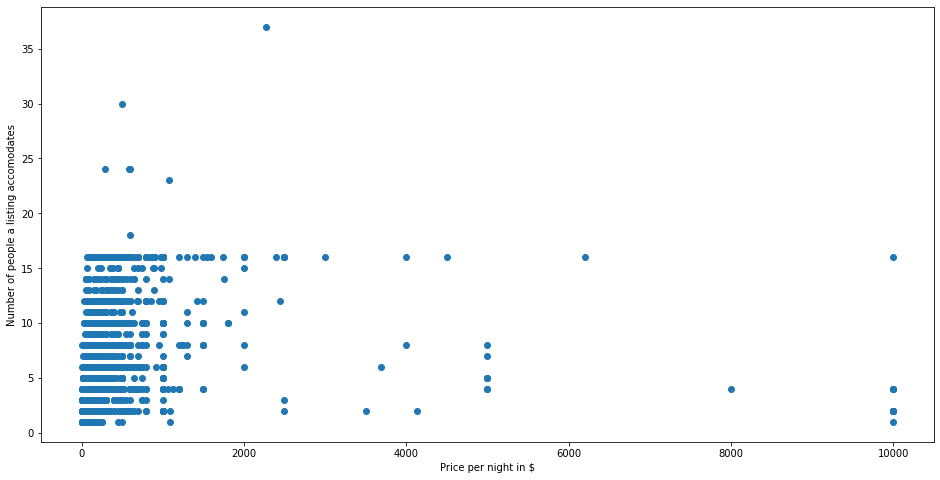

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_num['price'], data_num['accommodates'])
ax.set_ylabel('Number of people a listing accomodates')
ax.set_xlabel('Price per night in $')
plt.show()

In [75]:
print('Percentage of listings with price greater than $2000: {} %'.format(sum(data_num['price'] > 2000) / len(data_num['price']) * 100 ))

Percentage of listings with price greater than $2000: 0.41079812206572774 %


In [57]:
data_num_no_outliers = data_num[data_num['price'] <= 2000]
data_num_no_outliers.drop(data_num_no_outliers[data_num_no_outliers['price'] == 0].index, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
data_num_no_outliers.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8.482000e+03,8482.000000,8.482000e+03,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000,8482.000000
mean,41.897707,-87.662929,4.300401,1.380163,1.637213,2.187446,149.290380,210.235699,73.212129,2.226008,13.805470,6.308300,676.255836,6.300637,26.535841,812.113181,1.773086e+06,25.082103,1.656804e+06,17.365598,35.883990,54.859467,175.705376,41.543858,16.564372,94.644577,9.683348,9.520182,9.739717,9.736407,9.687245,9.464786,17.562839,14.775171,2.505541,0.164938,1.851011
std,0.058808,0.041450,2.960706,0.726419,1.145556,1.786319,172.145194,363.587886,64.447636,2.035348,21.593704,18.308802,526.965626,21.320468,119.096486,477.562212,6.167028e+07,114.918006,5.762404e+07,12.935672,24.132529,35.387288,134.412644,63.021792,21.458112,7.729531,0.732651,0.818218,0.748333,0.713823,0.667715,0.810232,42.198942,41.548244,9.000100,1.255867,1.834313
min,41.647360,-87.845270,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,41.871705,-87.685810,2.000000,1.000000,1.000000,1.000000,60.000000,0.000000,27.183457,1.000000,0.000000,1.000000,31.000000,1.000000,1.000000,200.000000,3.600000e+02,1.000000,3.323750e+02,0.000000,7.000000,16.000000,53.000000,2.000000,1.000000,93.000000,9.729332,9.000000,10.000000,10.000000,9.649466,9.000000,1.000000,1.000000,0.000000,0.000000,0.487481
50%,41.900285,-87.659205,4.000000,1.000000,1.000000,2.000000,100.000000,100.000000,58.000000,1.000000,10.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,23.000000,47.000000,70.000000,162.000000,17.000000,8.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.240000
75%,41.938868,-87.633370,6.000000,2.000000,2.000000,3.000000,164.000000,262.588784,100.000000,2.000000,23.750000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1.125000e+03,3.100000,1.125000e+03,30.000000,58.000000,88.000000,322.000000,54.000000,25.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,1.000000,0.000000,2.720000
max,42.022510,-87.537900,30.000000,11.000000,19.000000,30.000000,2000.000000,5000.000000,599.000000,24.000000,300.000000,500.000000,9000.000000,730.000000,730.000000,1460.000000,2.147484e+09,730.000000,2.006585e+09,30.000000,60.000000,90.000000,365.000000,623.000000,439.000000,100.000010,10.000001,10.000001,10.000001,10.000001,10.000001,10.000001,229.000000,229.000000,82.000000,17.000000,29.620000


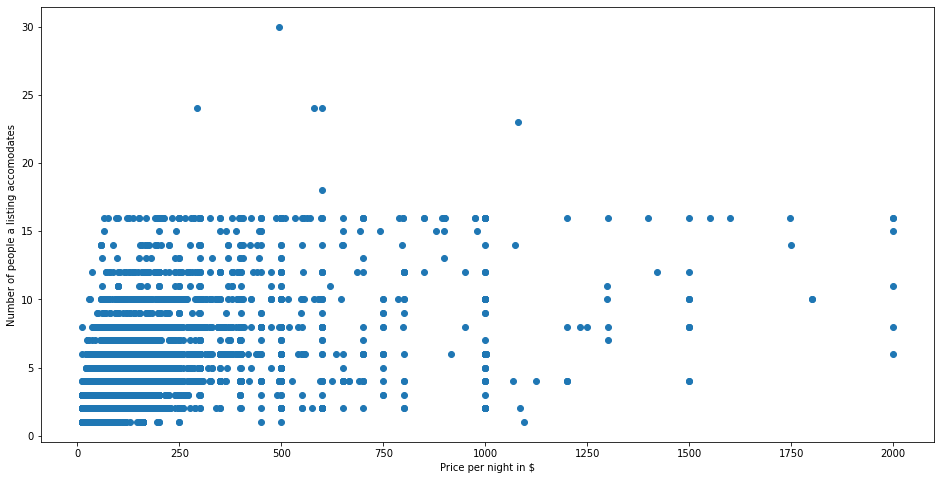

In [61]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_num_no_outliers['price'], data_num_no_outliers['accommodates'])
ax.set_ylabel('Number of people a listing accomodates')
ax.set_xlabel('Price per night in $')
plt.show()

In [0]:
scaler = StandardScaler()
scaler.fit(data_num_no_outliers)
data_num_no_outliers_scaled = scaler.transform(data_num_no_outliers)


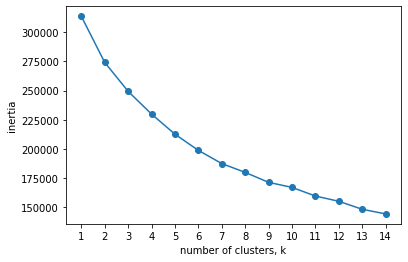

In [65]:
ks = range(1, 15) # number of clusters to test 
inertias = [] 

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(data_num_no_outliers_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# the output provides a linegraph of inertias given different numbers of clusters
# this is useful to identify the best number of clusters to choose (using the elbow method)

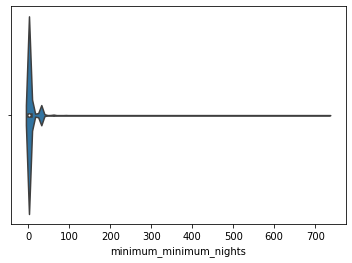

In [67]:
ax = sns.violinplot(x=data_num_no_outliers["minimum_minimum_nights"])

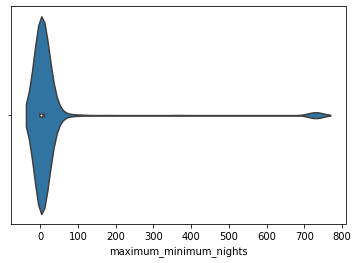

In [69]:
ax = sns.violinplot(x=data_num_no_outliers["maximum_minimum_nights"])

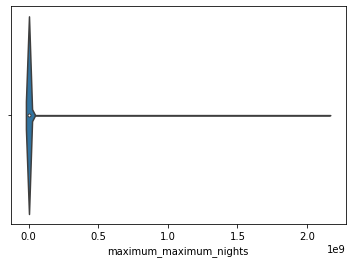

In [70]:
ax = sns.violinplot(x=data_num_no_outliers["maximum_maximum_nights"])

In [77]:
to_drop = ['calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','calculated_host_listings_count','review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value','minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights',	'maximum_maximum_nights',	'minimum_nights_avg_ntm',	'maximum_nights_avg_ntm']
data_num_no_outliers = data_num_no_outliers.drop(columns=to_drop)
data_num_no_outliers.describe()

KeyError: ignored

In [0]:
scaler = StandardScaler()
scaler.fit(data_num_no_outliers)
data_num_no_outliers_scaled = scaler.transform(data_num_no_outliers)


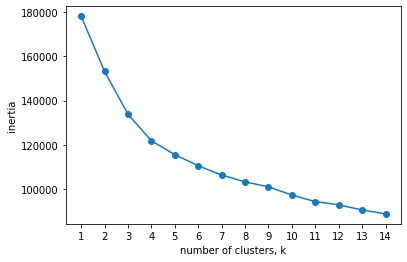

In [80]:
ks = range(1, 15) # number of clusters to test 
inertias = [] 

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(data_num_no_outliers_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# the output provides a linegraph of inertias given different numbers of clusters
# this is useful to identify the best number of clusters to choose (using the elbow method)

In [85]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
print('Original Shape {}'.format(X.shape))
print('Transformed Shape {}'.format(X_pca.shape))

Original Shape (8482, 20)
Transformed Shape (8482, 2)


In [0]:
X = data_num_no_outliers.drop(columns= 'price')
y = data_num_no_outliers['price']


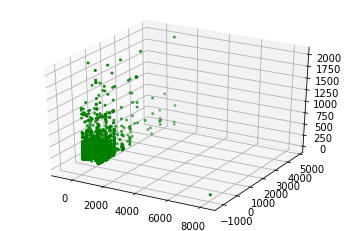

In [88]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the compressed data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], zs=y, s=4, lw=1, label="inliers",c="green")

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.30628133726811957
Root Mean Squared Error: 133.08595189184308
